In [1]:
#decision_boundaries.ipynb
#
#by Joe Hahn
#joe.hahn@oracle.com
#3 July 2018
#
#plot the system's decision boundaries, plus a sample of noisy data

In [2]:
#set system parameters
N_dots = 20000
x_half_width = 0.5
radius = 3.5
box_half_width = 7.1
jitter = 0.0
rn_seed = 13
initial_id = 0

In [3]:
#generate training data
import numpy as np
rn_state = np.random.RandomState(seed=rn_seed)
from helper_fns import *
df = make_xo_df(N_dots, initial_id, x_half_width, radius, box_half_width, jitter)
df.tail()

,id,x,y,r,angle,class,X_score,O_score,B_score
record,,,,,,,,,
19995,19995,4.771867,2.719944,5.492614,0.518065,B,0.0,0.0,1.0
19996,19996,0.338491,-6.787655,6.796090,-1.520969,B,0.0,0.0,1.0
19997,19997,1.118511,2.682538,2.906385,1.175755,O,0.0,1.0,0.0
19998,19998,-0.888904,-4.196009,4.289130,-1.779555,B,0.0,0.0,1.0
19999,19999,-7.785514,1.418436,7.913671,2.961380,B,0.0,0.0,1.0


In [4]:
#prep plots
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set(font_scale=1.5, font='DejaVu Sans')

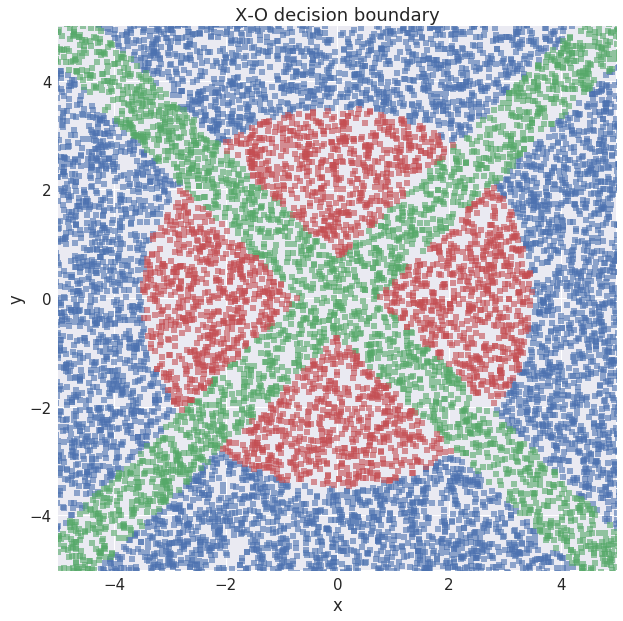

In [5]:
#scatterplot of jitterless (x,y) data, to show decision boundaries
xy_rng = (-5, 5)
sz = 30
f, ax = plt.subplots(figsize=(10,10))
lbl = 'B'
idx = (df['class'] == lbl)
xp = df[idx].x
yp = df[idx].y
p = sns.regplot(xp, yp, ax=ax, fit_reg=False, scatter_kws={'alpha':0.6, 's': sz}, marker='s', label=lbl)
lbl = 'X'
idx = (df['class'] == lbl)
xp = df[idx].x
yp = df[idx].y
p = sns.regplot(xp, yp, ax=ax, fit_reg=False, scatter_kws={'alpha':0.6, 's': sz}, marker='s', label=lbl)
lbl = 'O'
idx = (df['class'] == lbl)
xp = df[idx].x
yp = df[idx].y
p = sns.regplot(xp, yp, ax=ax, fit_reg=False, scatter_kws={'alpha':0.6, 's': sz}, marker='s', label=lbl)
p = ax.set_title('X-O decision boundary')
p = ax.set_xlabel('x')
p = ax.set_ylabel('y')
p = ax.set_xlim(xy_rng)
p = ax.set_ylim(xy_rng)
plt.savefig('figs/decision_boundary.png')